In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
burden_df = pd.read_csv('/Users/ryanyutian/Desktop/Manuscript/burden/burden_w_new_ID.csv')

In [4]:
burden_df

,sample_id,deletion,duplication,inversion,patient_id,tumour_stage,stage_rank
0,A_R_GBM607,0.076540,44.836725,1.271783,A,R,1
1,A_RR_GBM809,4.629430,71.113466,0.113179,A,RR,2
2,B_P_GBM593,2.503769,35.463616,0.424301,B,P,0
3,B_R_GBM898,0.511921,4.247862,0.159948,B,R,1
4,C_R_GBM781,17.987111,4.575489,0.769695,C,R,1
5,C_RR_GBM937,18.575854,42.908644,1.437594,C,RR,2
6,D_P_GBM620,3.953555,2.600816,0.213512,D,P,0
7,D_R_GBM691,5.204660,74.047255,1.594297,D,R,1
8,E_P_GBM454,0.553246,1.569931,0.444058,E,P,0
9,E_R_GBM833,0.833727,134.514173,0.352169,E,R,1


In [5]:
burden_dict = {}

for _, row in burden_df.iterrows():
    
    burden_dict[row['sample_id']] = row['deletion'] + row['duplication'] + row['inversion']

In [6]:
burden_dict

{'A_R_GBM607': 46.18504800000001,
 'A_RR_GBM809': 75.85607500000002,
 'B_P_GBM593': 38.391685999999986,
 'B_R_GBM898': 4.9197310000000005,
 'C_R_GBM781': 23.332295,
 'C_RR_GBM937': 62.922092,
 'D_P_GBM620': 6.767882999999999,
 'D_R_GBM691': 80.84621199999998,
 'E_P_GBM454': 2.567235,
 'E_R_GBM833': 135.700069,
 'F_P_GBM460': 509.9145350000001,
 'F_R_GBM492': 488.609452,
 'G_P_GBM401': 141.95874999999995,
 'G_R_GBM498': 405.05991099999994,
 'G_RR_GBM551': 373.39768200000003,
 'H_P_GBM529': 58.749589,
 'H_R_GBM832': 696.6370109999999,
 'I_P_BT2013110': 104.15168,
 'I_R_GBM745': 183.607591,
 'J_P_GBM703': 78.30020900000001,
 'J_R_SMTB781': 3.4093850000000003,
 'X_P_GBM440': 186.296958,
 'X_P_GBM577': 274.53248799999994,
 'X_P_GBM618': 8.284311000000002,
 'X_P_GBM672': 100.40625700000002,
 'X_P_SMTB123': 384.9045270000001,
 'X_R_GBM945': 582.347414,
 'X_R_SMTB135': 7.804867999999999,
 'X_R_SMTB241': 351.32789599999995,
 'X_R_SMTB302': 4.067572,
 'X_R_SMTB814': 288.11394000000007}

In [7]:
burden_dict_sorted = {k: v for k, v in sorted(burden_dict.items(), key=lambda item: item[1], reverse=True)}

In [8]:
burden_dict_sorted

{'H_R_GBM832': 696.6370109999999,
 'X_R_GBM945': 582.347414,
 'F_P_GBM460': 509.9145350000001,
 'F_R_GBM492': 488.609452,
 'G_R_GBM498': 405.05991099999994,
 'X_P_SMTB123': 384.9045270000001,
 'G_RR_GBM551': 373.39768200000003,
 'X_R_SMTB241': 351.32789599999995,
 'X_R_SMTB814': 288.11394000000007,
 'X_P_GBM577': 274.53248799999994,
 'X_P_GBM440': 186.296958,
 'I_R_GBM745': 183.607591,
 'G_P_GBM401': 141.95874999999995,
 'E_R_GBM833': 135.700069,
 'I_P_BT2013110': 104.15168,
 'X_P_GBM672': 100.40625700000002,
 'D_R_GBM691': 80.84621199999998,
 'J_P_GBM703': 78.30020900000001,
 'A_RR_GBM809': 75.85607500000002,
 'C_RR_GBM937': 62.922092,
 'H_P_GBM529': 58.749589,
 'A_R_GBM607': 46.18504800000001,
 'B_P_GBM593': 38.391685999999986,
 'C_R_GBM781': 23.332295,
 'X_P_GBM618': 8.284311000000002,
 'X_R_SMTB135': 7.804867999999999,
 'D_P_GBM620': 6.767882999999999,
 'B_R_GBM898': 4.9197310000000005,
 'X_R_SMTB302': 4.067572,
 'J_R_SMTB781': 3.4093850000000003,
 'E_P_GBM454': 2.567235}

In [5]:
sample_order_original = burden_df['sample_id'].tolist()

sample_order_original

['A_R_GBM607',
 'A_RR_GBM809',
 'B_P_GBM593',
 'B_R_GBM898',
 'C_R_GBM781',
 'C_RR_GBM937',
 'D_P_GBM620',
 'D_R_GBM691',
 'E_P_GBM454',
 'E_R_GBM833',
 'F_P_GBM460',
 'F_R_GBM492',
 'G_P_GBM401',
 'G_R_GBM498',
 'G_RR_GBM551',
 'H_P_GBM529',
 'H_R_GBM832',
 'I_P_BT2013110',
 'I_R_GBM745',
 'J_P_GBM703',
 'J_R_SMTB781',
 'X_P_GBM440',
 'X_P_GBM577',
 'X_P_GBM618',
 'X_P_GBM672',
 'X_P_SMTB123',
 'X_R_GBM945',
 'X_R_SMTB135',
 'X_R_SMTB241',
 'X_R_SMTB302',
 'X_R_SMTB814']

In [6]:
new_sample_id_order = [
 'A_R_GBM607',
 'A_RR_GBM809',
 'B_P_GBM593',
 'B_R_GBM898',
 'C_R_GBM781',
 'C_RR_GBM937',
 'D_P_GBM620',
 'D_R_GBM691',
 'E_P_GBM454',
 'E_R_GBM833',
 'F_P_GBM460',
 'F_R_GBM492',
 'G_P_GBM401',
 'G_R_GBM498',
 'G_RR_GBM551',
 'H_P_GBM529',
 'H_R_GBM832',
 'I_P_BT2013110',
 'I_R_GBM745',
 'J_P_GBM703',
 'J_R_SMTB781',
 'X_P_GBM618',
 'X_P_GBM577',
 'X_P_GBM440',
 'X_P_GBM672',
 'X_P_SMTB123',
 'X_R_SMTB135',
 'X_R_SMTB241',
 'X_R_SMTB302',
 'X_R_SMTB814',
 'X_R_GBM945']

In [7]:
burden_df['sample_id'] = pd.Categorical(burden_df['sample_id'], categories=new_sample_id_order, ordered=True)

burden_df = burden_df.sort_values('sample_id')

burden_df

,sample_id,deletion,duplication,inversion,patient_id,tumour_stage,stage_rank
0,A_R_GBM607,0.076540,44.836725,1.271783,A,R,1
1,A_RR_GBM809,4.629430,71.113466,0.113179,A,RR,2
2,B_P_GBM593,2.503769,35.463616,0.424301,B,P,0
3,B_R_GBM898,0.511921,4.247862,0.159948,B,R,1
4,C_R_GBM781,17.987111,4.575489,0.769695,C,R,1
5,C_RR_GBM937,18.575854,42.908644,1.437594,C,RR,2
6,D_P_GBM620,3.953555,2.600816,0.213512,D,P,0
7,D_R_GBM691,5.204660,74.047255,1.594297,D,R,1
8,E_P_GBM454,0.553246,1.569931,0.444058,E,P,0
9,E_R_GBM833,0.833727,134.514173,0.352169,E,R,1


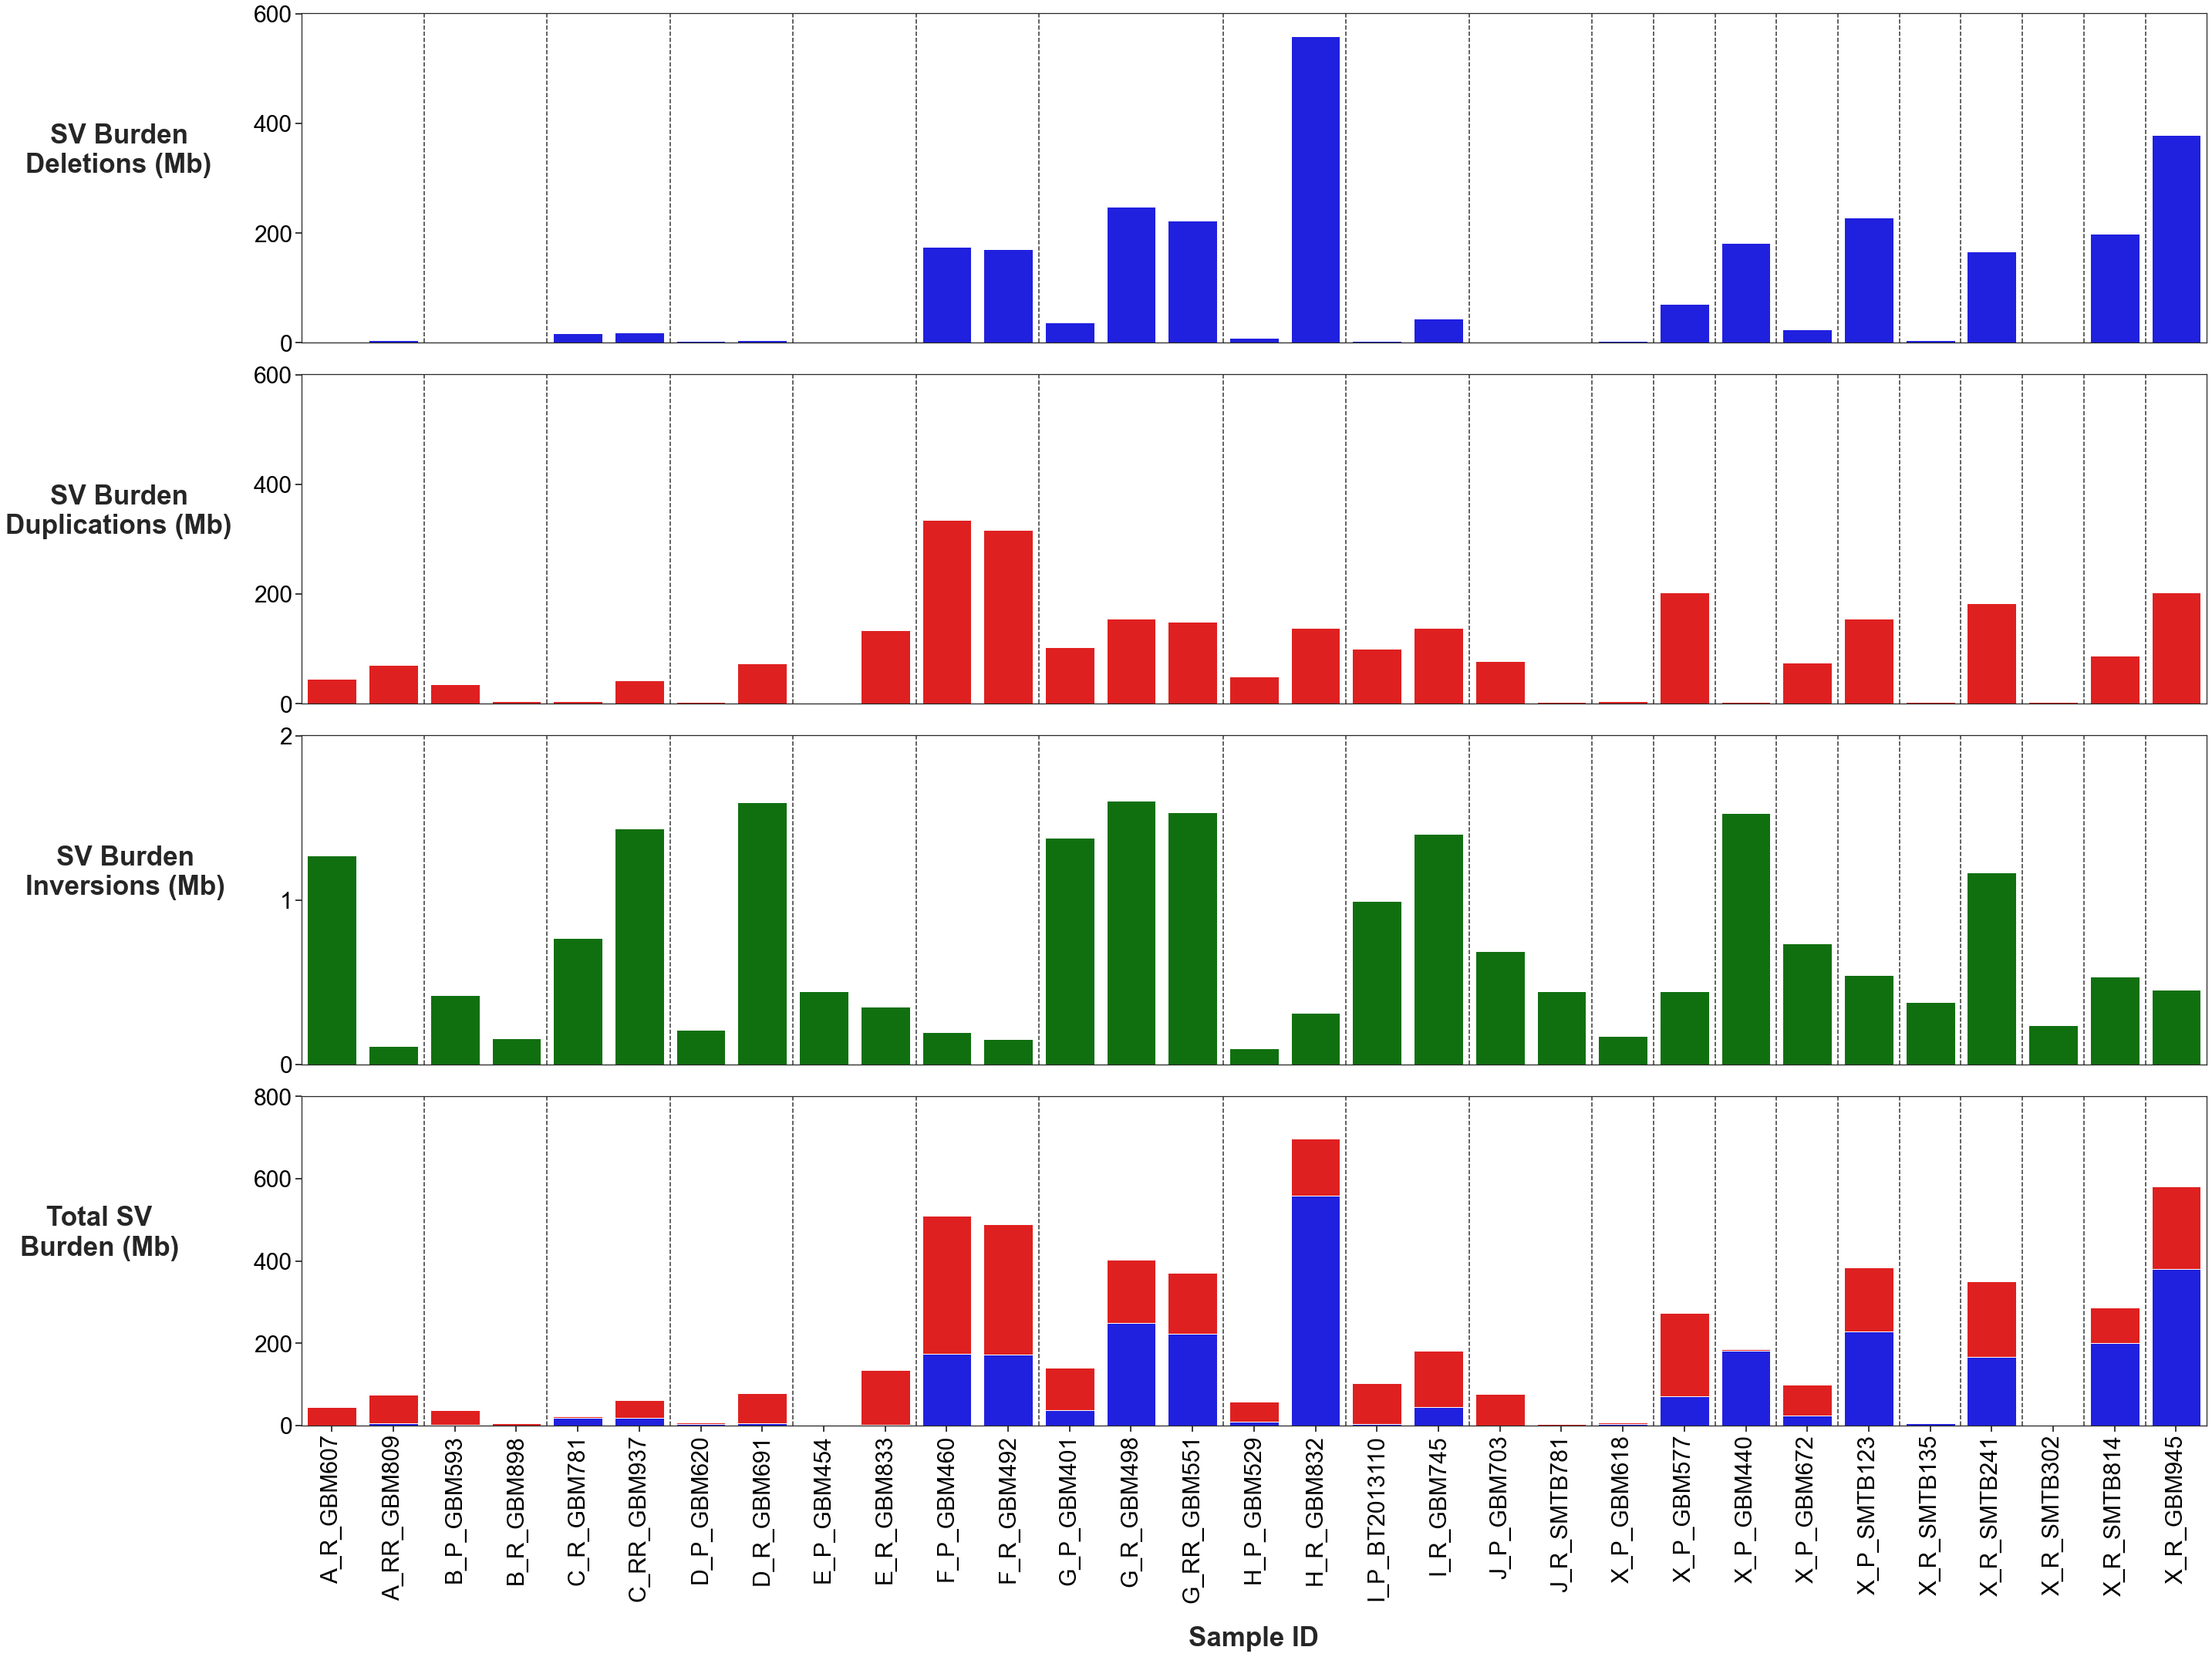

In [9]:
mid_ticks = np.array([1.5, 3.5, 5.5, 7.5, 9.5, 11.5, 14.5, 16.5, 18.5, 20.5, \
                      21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5])

# Setup plot appearance
sns.set(style='white', rc={"axes.facecolor": "white", "grid.color": "black"})

fig, axes = plt.subplots(4, 1, figsize=(40, 30), sharex=True)
palette_colors = ['blue', 'red', 'green']

# Plot Deletion
ax = axes[0]
sns.barplot(x='sample_id', y=burden_df['deletion'], data=burden_df, ax=ax, color=palette_colors[0])
ax.set_xlabel('')
ax.set_ylabel('SV Burden\nDeletions (Mb)', weight='bold', labelpad=175, fontsize=35, rotation=0, ha='center')
ax.set_ylim(0, 601)
ax.set_yticks(range(0, 601, 200))

# y-axis tick mark settings
ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis='y', which='both', length=8, width=1.5, direction='out', colors='black')
for tick in ax.yaxis.get_major_ticks():
    tick.tick1line.set_visible(True)
    tick.tick1line.set_linewidth(1.5)
    tick.tick1line.set_color('black')

for tick in ax.yaxis.get_minor_ticks():
    tick.tick1line.set_visible(True)
    tick.tick1line.set_linewidth(1.5)
    tick.tick1line.set_color('black')

xticks_locs = ax.get_xticks()
ax.xaxis.set_minor_locator(ticker.FixedLocator(mid_ticks))
ax.grid(which='minor', axis='x', linestyle='--', linewidth=1.5, alpha=0.8, color='black')

# Plot Duplication
ax = axes[1]
sns.barplot(x='sample_id', y=burden_df['duplication'], data=burden_df, ax=ax, color=palette_colors[1])
ax.set_xlabel('')
ax.set_ylabel('SV Burden\nDuplications (Mb)', weight='bold', labelpad=175, fontsize=35, rotation=0, ha='center')
ax.set_ylim(0, 601)
ax.set_yticks(range(0, 601, 200))

# y-axis tick mark settings
ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis='y', which='both', length=8, width=1.5, direction='out', colors='black')
for tick in ax.yaxis.get_major_ticks():
    tick.tick1line.set_visible(True)
    tick.tick1line.set_linewidth(1.5)
    tick.tick1line.set_color('black')

for tick in ax.yaxis.get_minor_ticks():
    tick.tick1line.set_visible(True)
    tick.tick1line.set_linewidth(1.5)
    tick.tick1line.set_color('black')


xticks_locs = ax.get_xticks()
ax.xaxis.set_minor_locator(ticker.FixedLocator(mid_ticks))
ax.grid(which='minor', axis='x', linestyle='--', linewidth=1.5, alpha=0.8, color='black')

# Plot Inversion
ax = axes[2]
sns.barplot(x='sample_id', y=burden_df['inversion'], data=burden_df, ax=ax, color=palette_colors[2])
ax.set_xlabel('')
ax.set_ylabel('SV Burden\nInversions (Mb)', weight='bold', labelpad=200, fontsize=35, rotation=0, ha='center')
ax.set_ylim(0, 2.005)
ax.set_yticks(np.arange(0, 2.005, 1))

# y-axis tick mark settings
ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis='y', which='both', length=8, width=1.5, direction='out', colors='black')
for tick in ax.yaxis.get_major_ticks():
    tick.tick1line.set_visible(True)
    tick.tick1line.set_linewidth(1.5)
    tick.tick1line.set_color('black')

for tick in ax.yaxis.get_minor_ticks():
    tick.tick1line.set_visible(True)
    tick.tick1line.set_linewidth(1.5)
    tick.tick1line.set_color('black')

xticks_locs = ax.get_xticks()
ax.xaxis.set_minor_locator(ticker.FixedLocator(mid_ticks))
ax.grid(which='minor', axis='x', linestyle='--', linewidth=1.5, alpha=0.8, color='black')

# Plot Stacked Barplot
ax = axes[3]
bottom_bar = sns.barplot(x='sample_id', y=burden_df['deletion'], data=burden_df, ax=ax, color=palette_colors[0])
middle_bar = sns.barplot(x='sample_id', y=burden_df['duplication'], data=burden_df, ax=ax, color=palette_colors[1], bottom=(burden_df['deletion']))
top_bar = sns.barplot(x='sample_id', y=burden_df['inversion'], data=burden_df, ax=ax, color=palette_colors[2], bottom=(burden_df['deletion']+burden_df['duplication']))
ax.set_ylabel('Total SV\nBurden (Mb)', weight='bold', labelpad=200, fontsize=35, rotation=0, ha='center')
ax.set_ylim(0, 801)
ax.set_yticks(range(0, 801, 200))

ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis='both', which='both', length=8, width=1.5, direction='out', colors='black')

# y-axis tick mark settings
for tick in ax.yaxis.get_major_ticks():
    tick.tick1line.set_visible(True)
    tick.tick1line.set_linewidth(1.5)
    tick.tick1line.set_color('black')

for tick in ax.yaxis.get_minor_ticks():
    tick.tick1line.set_visible(True)
    tick.tick1line.set_linewidth(1.5)
    tick.tick1line.set_color('black')

# x-axis tick mark settings
for tick in ax.xaxis.get_major_ticks():
    tick.tick1line.set_visible(True)
    tick.tick1line.set_linewidth(1.5)
    tick.tick1line.set_color('black')


xticks_locs = ax.get_xticks()
ax.xaxis.set_minor_locator(ticker.FixedLocator(mid_ticks))
ax.grid(which='minor', axis='x', linestyle='--', linewidth=1.5, alpha=0.8, color='black')

ax.set_xlabel('Sample ID', weight='bold', labelpad=30, fontsize=35)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=30)

plt.tight_layout()

fig.savefig('/Users/ryanyutian/Desktop/Manuscript/burden/burden_all.png', dpi=300, bbox_inches='tight')